In [1]:
%matplotlib inline
from ROOT import TFile, TTree
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from root_numpy import root2array

In [10]:
myfile = '/Users/davidkaleko/larlite/UserDev/KalekoAna/LArSoftImport/mac/'
myfile_mc   = myfile + 'testmultiscattermomentum_output_MC.root'
myfile_reco = myfile + 'testmultiscattermomentum_output_RECO.root'
dfs = { 'mc'   : pd.DataFrame( root2array( myfile_mc,   'ana_tree' ) ),
        'reco' : pd.DataFrame( root2array( myfile_reco, 'ana_tree' ) ) }

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17811
Data columns (total 5 columns):
true_mom        17812 non-null float64
mcs_reco_mom    17812 non-null float64
true_len        17812 non-null float64
reco_len        17812 non-null float64
mu_contained    17812 non-null bool
dtypes: bool(1), float64(4)
memory usage: 713.2 KB
None


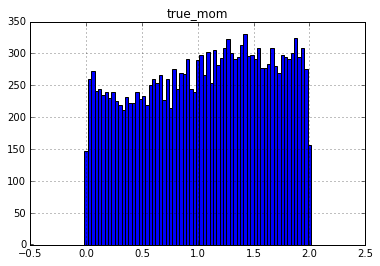

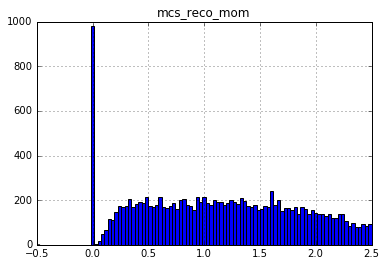

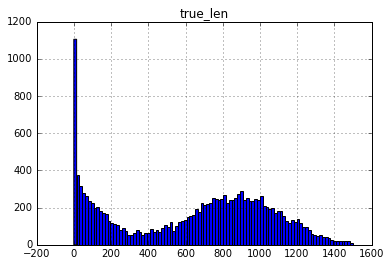

In [50]:
print dfs['mc'].info()
fart = dfs['mc'].hist('true_mom',bins=np.linspace(-0.5,2.5,100))
fart = dfs['mc'].hist('mcs_reco_mom',bins=np.linspace(-0.5,2.5,100))
fart = dfs['mc'].hist('true_len',bins=np.linspace(-0.5,1500,100))

In [73]:
#reco_mom-true_mom/true_mom
def pres_plot(mytype = 'mc', cuts=None, ylims=None, nbins=50):
    binning = np.linspace(0.1,3,nbins)
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds = [], []
    for x in xrange(len(binning)-1):
        binmin = binning[x]
        binmax = binning[x+1]
        mydf = dfs[mytype]
        if cuts is not None: 
            mydf = mydf.query(cuts)
        mydf = mydf.query('true_mom < %f and true_mom > %f'%(binmax,binmin))
        true = np.array(mydf['true_mom'])
        reco = np.array(mydf['mcs_reco_mom'])
        myreses.append( ((reco-true)/true).mean() )
        mystds.append( ((reco-true)/true).std() )
    plt.figure(figsize=(10,6))
    plt.plot(bincenters[:-1],myreses,'ro--',label='Mean of Distribution')
    plt.plot(bincenters[:-1],mystds,'bo--',label='Std of Distribution')
    plt.ylabel('$\\frac{MCS Reco p - True p}{True p}$: Mean, or Std',fontsize=15)
    plt.xlabel('True Muon Momentum [GeV]',fontsize=15)
    plt.grid(True)
    if not ylims:
        plt.ylim((-0.25,0.75))
    else:
        plt.ylim(ylims)
    plt.legend()
    
def pres_plot_vslength(mytype = 'mc', cuts=None, ylims=None, nbins=50):
    lengthvar = 'true_len' if mytype == 'mc' else 'reco_len'
    binning = np.linspace(0,1300,nbins)
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds = [], []
    for x in xrange(len(binning)-1):
        binmin = binning[x]
        binmax = binning[x+1]
        mydf = dfs[mytype]
        if cuts is not None: 
            mydf = mydf.query(cuts)
        mydf = mydf.query('%s < %f and %s > %f'%(lengthvar,binmax,lengthvar,binmin))
        true = np.array(mydf['true_mom'])
        reco = np.array(mydf['mcs_reco_mom'])
        myreses.append( ((reco-true)/true).mean() )
        mystds.append( ((reco-true)/true).std() )
    plt.figure(figsize=(10,6))
    plt.plot(bincenters[:-1],myreses,'ro--',label='Mean of Distribution')
    plt.plot(bincenters[:-1],mystds,'bo--',label='Std of Distribution')
    plt.ylabel('$\\frac{MCS Reco p - True p}{True p}$: Mean, or Std',fontsize=15)
    plt.xlabel('Track Length [cm]',fontsize=15)
    plt.grid(True)
    if not ylims:
        plt.ylim((-0.25,0.75))
    else:
        plt.ylim(ylims)
    plt.legend()


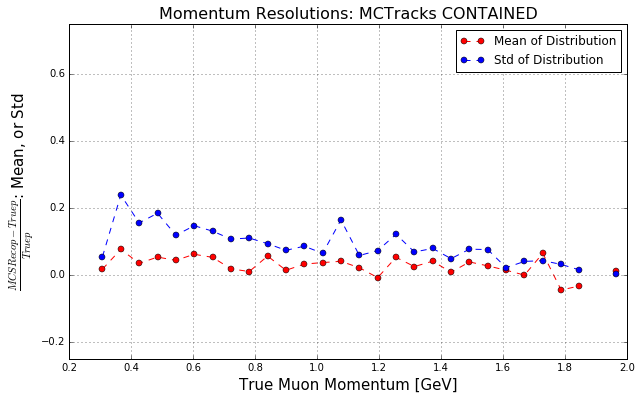

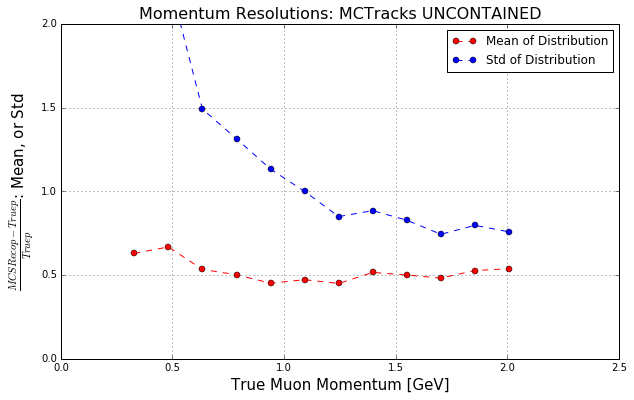

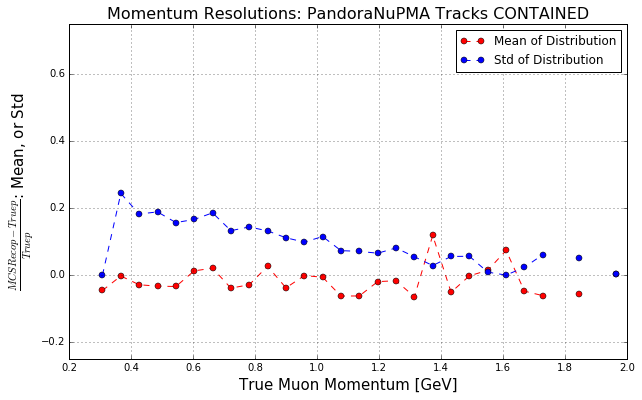

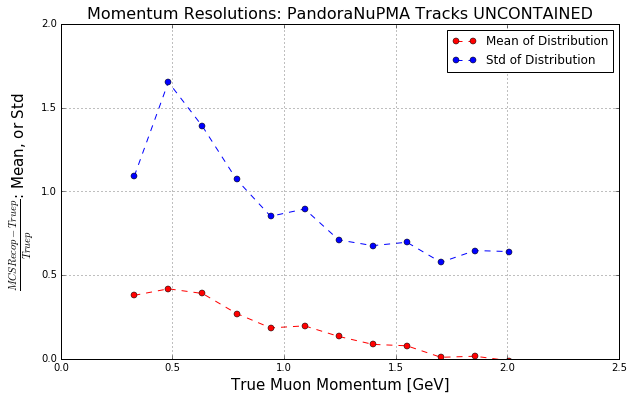

In [72]:
pres_plot(mytype='mc',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained',
          ylims=(-0.25,0.75),
         nbins=50)
plt.title('Momentum Resolutions: MCTracks CONTAINED',fontsize=16)

pres_plot(mytype='mc',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained == False',
          ylims=(0,2.),
         nbins=20)
plt.title('Momentum Resolutions: MCTracks UNCONTAINED',fontsize=16)

pres_plot(mytype='reco',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained',
          ylims=(-0.25,0.75),
         nbins=50)
plt.title('Momentum Resolutions: PandoraNuPMA Tracks CONTAINED',fontsize=16)

pres_plot(mytype='reco',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained == False',
          ylims=(0,2.),
         nbins=20)
plt.title('Momentum Resolutions: PandoraNuPMA Tracks UNCONTAINED',fontsize=16)

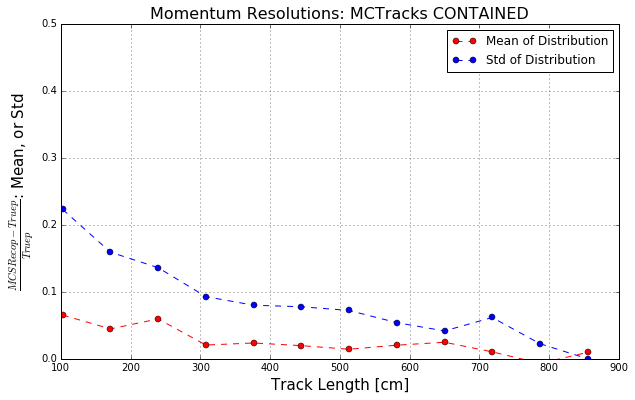

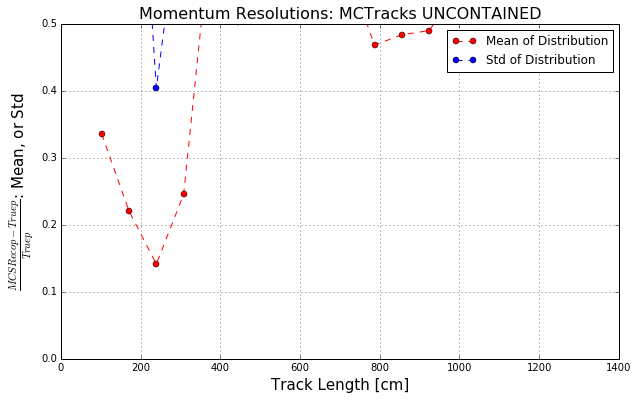

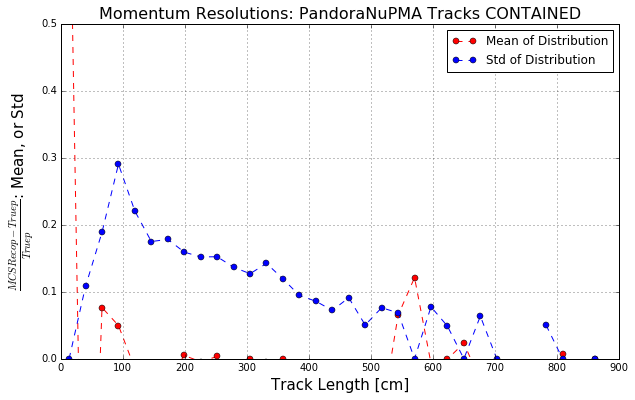

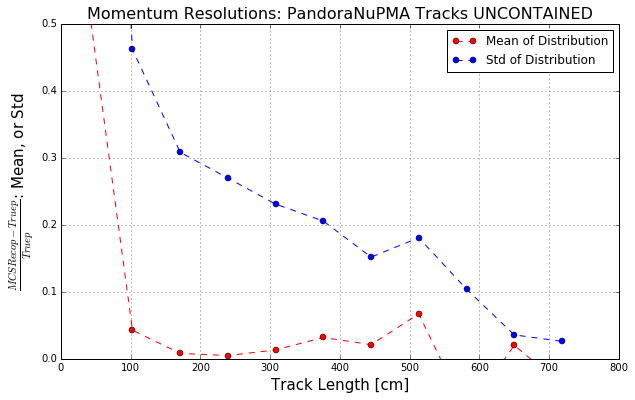

In [80]:
pres_plot_vslength(mytype='mc',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained',
          ylims=(0,0.5),
         nbins=20)
plt.title('Momentum Resolutions: MCTracks CONTAINED',fontsize=16)


pres_plot_vslength(mytype='mc',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained == False',
          ylims=(0,.5),
         nbins=20)
plt.title('Momentum Resolutions: MCTracks UNCONTAINED',fontsize=16)

pres_plot_vslength(mytype='reco',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained',
          ylims=(0,0.5),
         nbins=50)
plt.title('Momentum Resolutions: PandoraNuPMA Tracks CONTAINED',fontsize=16)

pres_plot_vslength(mytype='reco',
          cuts='mcs_reco_mom > 0.002 and true_len > 100. and mu_contained == False',
          ylims=(0,.5),
         nbins=20)
plt.title('Momentum Resolutions: PandoraNuPMA Tracks UNCONTAINED',fontsize=16)

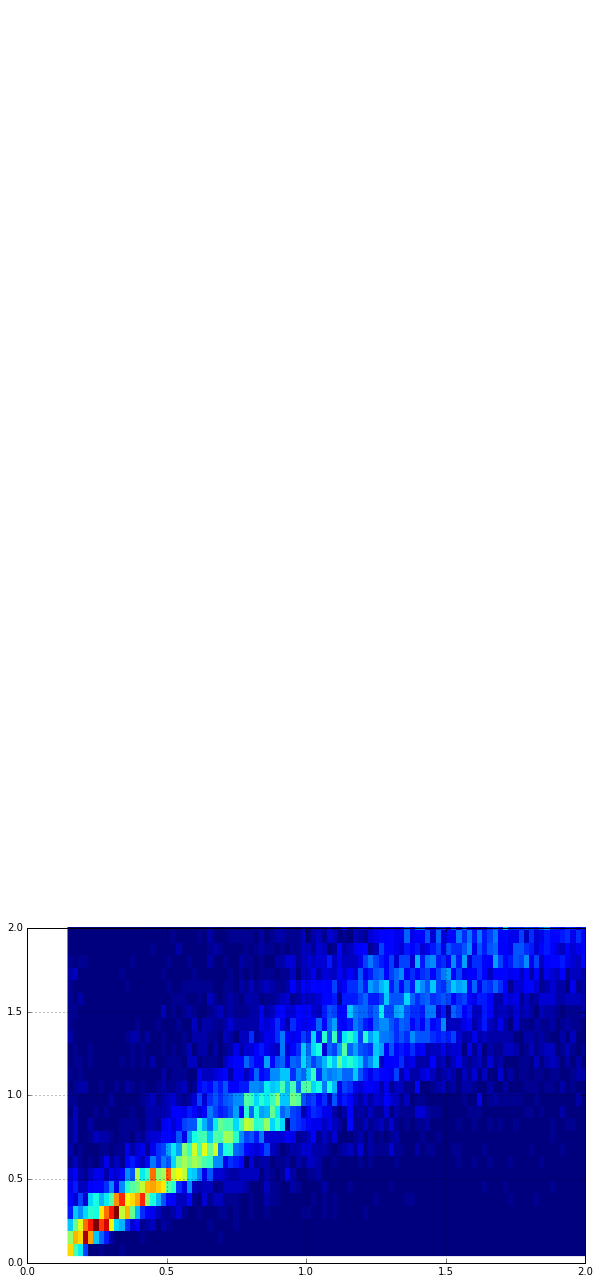

In [38]:
mycut = 'mcs_reco_mom > 0.01'
poop = dfs['mc'].query(mycut)['true_mom']
fart = dfs['mc'].query(mycut)['mcs_reco_mom']
plt.figure(figsize=(10,6))
pee = plt.hist2d(poop,fart,bins=100)
blah = plt.xlim((0,2.0))
blah = plt.ylim((0,2.0))
plt.grid(True)